In [17]:
# coding:utf-8


import jieba
import pandas as pd
import codecs
import string
import re

# 清洗文本
def clearTxt(line:str):
    if(line != ''):
        line = line.strip()
        # 去除文本中的英文和数字
        line = re.sub("[a-zA-Z0-9]", "", line)
        # 去除文本中的中文符号和英文符号
        line = re.sub("[\s+\.\!\/_,$%^*(+\"\'；：“”．]+|[+——！，。？?、~@#￥%……&*（）]+", "", line)
        return line
    return None

#文本切割
def sent2word(line):
    segList = jieba.cut(line,cut_all=False)
    segSentence = ''
    for word in segList:
        if word != '\t':
            segSentence += word + " "
    return segSentence.strip()



if __name__ == '__main__':
    df = pd.read_csv('data/article.csv')
    target = codecs.open('data/cut.txt', 'w', encoding='utf-8')
    for i in df['text']:
        line = clearTxt(i)
        seg_line = sent2word(line)
        target.writelines(seg_line + '\n')

In [2]:
df = pd.read_csv('data/article.csv')
target = codecs.open('data/cut.txt', 'w', encoding='utf-8')

In [3]:
for i in df['text']:
    print(i)

JensenAckles超话#DanneelAckles##情人节快乐#Jensen撒狗粮！！知道了知道了……蛋妞是你的，永远是你的！
#李汶翰线上音乐节##李汶翰#你每一句漫不经心的话，都是我始料未及的欢愉。我要全部当真，我要一一回应。情人节快乐！@UNINE_李汶翰BazaarV的秒拍视频
情人节快乐！喔～对不起我没有资格过节…但我的猫他………却………算了算了～默默的承受了太多曹曦月的微博视频
季芹超话王仁甫超话轉芹仁粉專與芹姐IG，芹仁節當然得閃一下，但近期都很有默契的讓孟孟先閃完祝福大家情人節快樂的同時，也要祈禱大家能共同渡過難關🙏健康、平安最重要！
美国时间情人节，宠女狂魔詹姆斯晒出和Zhuri的合照：“情人节快乐，我的小公主！爸爸很爱你！”#NBA吐槽大会#
#不可辜负的美食#昨天一天做了25个蛋糕还拒了N个幸亏小伙伴来帮忙真的是突破极限忙到昏天暗地祝大家昨天情人节快乐啦今天补发一个。银川·原麦烘焙
肖骁超话#情人节快乐##性敢中环#【性敢中环|第一季1～3集|CUT1】@肖骁Mix主演港剧《性敢中环》，星厨Max，暖力爆棚！情不知所起，一往而深。同名电影#热血姐妹团#部分【前情回顾】祝，情人节快乐！（未完待续～）肖少奶奶的后宫的微博视频
清一下之前的库存[点亮橙色]祝大家昨天情人节快乐
🎻告白之夜2.14情人节快乐等待大猪蹄子上线深圳LMJ子木梳的微博视频
VLOG2男朋友的生日小游戏小陈紧张到几乎全程普通话不标准快来跟我一起笑话他🤪可能我是史上男友生日时最邋遢的女朋友了不化妆穿睡衣还很嘚瑟哈哈哈希望大家都开心幸福情人节快乐❤️#naomisdaily#闹闹闹米的微博视频
美国时间情人节，宠女狂魔詹姆斯晒出和Zhuri的合照：“情人节快乐，我的小公主！爸爸很爱你！”#NBA吐槽大会#
#不可辜负的美食#昨天一天做了25个蛋糕还拒了N个幸亏小伙伴来帮忙真的是突破极限忙到昏天暗地祝大家昨天情人节快乐啦今天补发一个。银川·原麦烘焙
肖骁超话#情人节快乐##性敢中环#【性敢中环|第一季1～3集|CUT1】@肖骁Mix主演港剧《性敢中环》，星厨Max，暖力爆棚！情不知所起，一往而深。同名电影#热血姐妹团#部分【前情回顾】祝，情人节快乐！（未完待续～）肖少奶奶的后宫的微博视频
情人节快乐！跟大家分享我平时的出门妆容！我心里的斩男妆！千万别让男孩子看到你的血盆大口和

In [11]:
from urllib.parse import urlencode
import requests
from pyquery import PyQuery as pq
import time
import os
import csv
import json

base_url = 'https://m.weibo.cn/api/container/getIndex?'

headers = {
    'Host': 'm.weibo.cn',
    'Referer': 'https://m.weibo.cn/u/2830678474',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
}
class SaveCSV(object):

    def save(self, keyword_list,path, item):
        """
        保存csv方法
        :param keyword_list: 保存文件的字段或者说是表头
        :param path: 保存文件路径和名字
        :param item: 要保存的字典对象
        :return:
        """
        try:
            # 第一次打开文件时，第一行写入表头
            if not os.path.exists(path):
                with open(path, "w", newline='', encoding='utf-8') as csvfile:  # newline='' 去除空白行
                    writer = csv.DictWriter(csvfile, fieldnames=keyword_list)  # 写字典的方法
                    writer.writeheader()  # 写表头的方法

            # 接下来追加写入内容
            with open(path, "a", newline='', encoding='utf-8') as csvfile:  # newline='' 一定要写，否则写入数据有空白行
                writer = csv.DictWriter(csvfile, fieldnames=keyword_list)
                writer.writerow(item)  # 按行写入数据
                print("^_^ write success")

        except Exception as e:
            print("write error==>", e)
            # 记录错误数据
            with open("error.txt", "w") as f:
                f.write(json.dumps(item) + ",\n")
            pass

def get_page(page,title): #得到页面的请求，params是我们要根据网页填的，就是下图中的Query String里的参数
    params = {
        'containerid': '100103type=1&q='+title,
        'page': page,#page是就是当前处于第几页，是我们要实现翻页必须修改的内容。
        'type':'all',
        'queryVal':title,
        'featurecode':'20000320',
        'luicode':'10000011',
        'lfid':'106003type=1',
        'title':title
    }
    url = base_url + urlencode(params)
    print(url)
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            print(page) 
            return response.json()
    except requests.ConnectionError as e:
        print('Error', e.args)

# 解析接口返回的json字符串
def parse_page(json , label):
    res = []
    if json:
        items = json.get('data').get('cards')
        for i in items:
            if i == None:
                continue
            item = i.get('mblog')
            if item == None:
                continue
            weibo = {}
            weibo['id'] = item.get('id')
            weibo['label'] = label
            weibo['text'] = pq(item.get('text')).text().replace(" ", "").replace("\n" , "")
            res.append(weibo)
    return res

if __name__ == '__main__':

    title = input("请输入搜索关键词：")
    path = "data/article.csv"
    item_list = ['id','text', 'label']
    s = SaveCSV()
    for page in range(10,20):#循环页面
        try:
            time.sleep(1)         #设置睡眠时间，防止被封号
            json = get_page(page , title )
            results = parse_page(json , title)
            if requests == None:
                continue
            for result in results:
                if result == None:
                    continue
                print(result)
                s.save(item_list, path , result)
        except TypeError:
            print("完成")
            continue




请输入搜索关键词：asd
https://m.weibo.cn/api/container/getIndex?containerid=100103type%3D1%26q%3Dasd&page=10&type=all&queryVal=asd&featurecode=20000320&luicode=10000011&lfid=106003type%3D1&title=asd
10
https://m.weibo.cn/api/container/getIndex?containerid=100103type%3D1%26q%3Dasd&page=11&type=all&queryVal=asd&featurecode=20000320&luicode=10000011&lfid=106003type%3D1&title=asd
11
https://m.weibo.cn/api/container/getIndex?containerid=100103type%3D1%26q%3Dasd&page=12&type=all&queryVal=asd&featurecode=20000320&luicode=10000011&lfid=106003type%3D1&title=asd
12
https://m.weibo.cn/api/container/getIndex?containerid=100103type%3D1%26q%3Dasd&page=13&type=all&queryVal=asd&featurecode=20000320&luicode=10000011&lfid=106003type%3D1&title=asd
Error (MaxRetryError("HTTPSConnectionPool(host='m.weibo.cn', port=443): Max retries exceeded with url: /api/container/getIndex?containerid=100103type%3D1%26q%3Dasd&page=13&type=all&queryVal=asd&featurecode=20000320&luicode=10000011&lfid=106003type%3D1&title=asd (Caused 

KeyboardInterrupt: 

In [6]:
seg_line = sent2word(line)

In [7]:
seg_line

'【 法式 巧克力 脆 米糕 】 仅 需 三步 就 可以 做出 香脆 甜蜜 的 法式 巧克力 脆 米糕 史上 最 简单 的 甜点 教程 情人节 吃不完 的 巧克力 别 浪费 融化 一下 万物 皆 可 裹 裹 出 你 喜欢 的 小 甜点 把 独家 记忆 延长 更久 一点儿 鲜城 甜品 创意 美食 烘焙 的 微博 视频'

In [8]:
target.writelines(seg_line + '\n')

In [9]:
target

In [10]:
seg_line + '\n'

'【 法式 巧克力 脆 米糕 】 仅 需 三步 就 可以 做出 香脆 甜蜜 的 法式 巧克力 脆 米糕 史上 最 简单 的 甜点 教程 情人节 吃不完 的 巧克力 别 浪费 融化 一下 万物 皆 可 裹 裹 出 你 喜欢 的 小 甜点 把 独家 记忆 延长 更久 一点儿 鲜城 甜品 创意 美食 烘焙 的 微博 视频\n'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


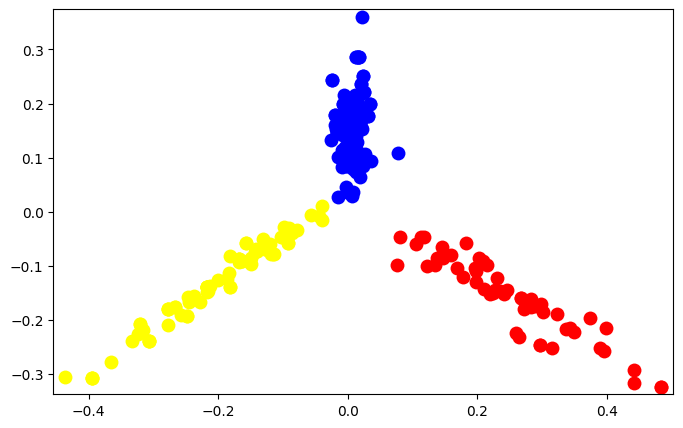

千万 不要 在 床上 办公 不然 你 会 发现 睡觉 更 有意思 在家 办公 基本上 就民 咕咕 这个 状态 了 宋 民国 的 秒 拍 视频
千万 不要 在 床上 办公 进 小区 都 要 对 暗号 了 呼伦贝尔 呼伦贝尔 晓鑫 的 微博 视频
📷 ‘ ’ 浙江 乌镇 🇨 🇳 中国 无 你 的 日子 处处 有 你 我 把 你 的 名字 种满 了 手心 手背 房前 屋后 白天黑夜 种 瘦 了 我 整个 烟雨 江南 陆苏 千万 不要 在 床上 办公 乌镇 广州
千万 不要 在 床上 办公 伴侣 就要 找 那种 睡 相让 你 觉得 很 喜欢 的 人
宅家 零食 之肥宅 快乐 膨化食品 整理 了 一 看 咋 都 是 高热量 味儿 的 你们 家里 还有 存货 么 千万 不要 在 床上 办公 不可 辜负 的 美食 吃货 在 这里
云村 在 行动 抗疫 防疫 我们 在 一起 即使 此刻 没有 阳光 我们 依然 要 努力 地 拥抱 春天 歌手 徐炳超 温暖 发声 和 你们 在 一起 武汉 加油 > > 网页 链接 网易 云 音乐 的 微博 视频
漫画 战疫 【 人民日报 新 媒体 哔哩 哔哩 漫画 】 联合 出品 《 与 时间 赛跑 的 病人 医生 》 动态 漫 版本 上线 了 本篇 改编自 金银 潭 医院院长 真实 故事 改编 漫画 我们 希望 仅 以此 片 献给 仍 在 一线 奋斗 的 医护人员 武汉 加油 中国 加油 《 与 时间 赛跑 的 病人 医生 》 漫画 原作 人民日报 新 媒体 人民日报 全文
成都 下雪 武汉 加油 一块 过关 信阳
今天 是 这 是 京杭大运河 武林 门 码头 段 水路 的 交通 正在 慢慢 复苏 一切都是 那么 的 井井有序 随着 春天 的 到来 相信 这场 疫情 马上 就 会 结束 杭城 又 会 显示 出 生机勃勃 繁荣 向上 的 景象 加油 武汉 💪 加油 中国 💪 杭州 · 武林 外滩 郑勇 - 道 知斋 之三 的 微博 视频
防控 疫情 小贴士 我们 与 鹿晗 鹿 一起 为 武汉 加油 为 中国 加油战 疫情 我们 一起 什么 是 炎症 风暴 追剧 小 主妇 的 微博 视频
超话 情人节 快乐 撒狗 粮 知道 了 知道 了 蛋 妞 是 你 的 永远 是 你 的
李汶翰线 上 音乐节 李汶翰 你 每 一句 漫不经心 的话 都 是 我 始料未

IndexError: list index out of range

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

def labels_to_original(labels, forclusterlist):
    assert len(labels) == len(forclusterlist)
    maxlabel = max(labels)
    numberlabel = [i for i in range(0, maxlabel + 1, 1)]
    numberlabel.append(-1)
    result = [[] for i in range(len(numberlabel))]
    for i in range(len(labels)):
        index = numberlabel.index(labels[i])
        result[index].append(forclusterlist[i])
    return result

if __name__ == '__main__':
    # 分类数
    num = 3

    # 读取语料库
    corpus = []
    txt = open("data/cut.txt", "r", encoding='utf-8').read().split("\n")
    for str in txt:
        corpus.append(str)

    # 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
    vectorizer = CountVectorizer(max_features=20000)
    # 该类会统计每个词语的tf-idf权值
    tf_idf_transformer = TfidfTransformer()
    # 将文本转为词频矩阵并计算tf-idf
    tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(corpus))
    # 获取词袋模型中的所有词语
    tfidf_matrix = tfidf.toarray()
    # 获取词袋模型中的所有词语
    word = vectorizer.get_feature_names_out()
    # print(word)
    # # 统计词频tf_vectorizer.()
    # print(tfidf)

    # 聚成5类
    clf = KMeans(n_clusters=num)
    s = clf.fit(tfidf_matrix)

    # 每个样本所属的簇
    label = []
    i = 1
    while i <= len(clf.labels_):
        label.append(clf.labels_[i - 1])
        i = i + 1
    # 获取标签聚类
    y_pred = clf.labels_

    # pca降维，将数据转换成二维
    pca = PCA(n_components=2)  # 输出两维
    newData = pca.fit_transform(tfidf_matrix)  # 载入N维

    xs, ys = newData[:, 0], newData[:, 1]
    # 设置颜色
    cluster_colors = {0: 'r', 1: 'yellow', 2: 'b', 3: 'chartreuse', 4: 'purple', 5: '#FFC0CB', 6: '#6A5ACD',
                      7: '#98FB98'}

    # 设置类名
    cluster_names = {0: u'类0', 1: u'类1', 2: u'类2', 3: u'类3', 4: u'类4', 5: u'类5', 6: u'类6', 7: u'类7'}

    df = pd.DataFrame(dict(x=xs, y=ys, label=y_pred, title=corpus))
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(8, 5))  # set size
    ax.margins(0.02)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name],
                color=cluster_colors[name], mec='none')
    plt.show()

    res = labels_to_original(y_pred , corpus)

    for i in range(len(res)):
        for j in range(5):
            print(res[i][j])
        print("=======================")









[0 0 0 0 1 1 1 1]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


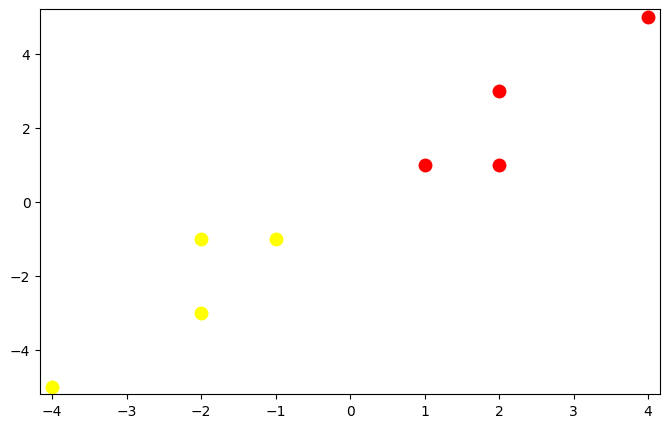

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

if __name__ == '__main__':
    datas = np.array([[1,1],[2,3],[4,5],[2,1],[-1,-1],[-2,-3],[-4,-5],[-2,-1]])
    x,y = datas[:,0],datas[:,1]

    # 设置颜色
    cluster_colors = {0: 'r', 1: 'yellow', 2: 'b', 3: 'chartreuse', 4: 'purple', 5: '#FFC0CB', 6: '#6A5ACD',
                      7: '#98FB98'}

    # 设置类名
    cluster_names = {0: u'类0', 1: u'类1', 2: u'类2', 3: u'类3', 4: u'类4', 5: u'类5', 6: u'类6', 7: u'类7'}

    clf = KMeans(n_clusters=2)
    s = clf.fit(datas)
    print(clf.labels_)

    fig, ax = plt.subplots(figsize=(8, 5))  # set size

    df = pd.DataFrame(dict(x=x, y=y, label=clf.labels_))
    groups = df.groupby('label')
    ax.margins(0.02)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name],
                color=cluster_colors[name], mec='none')
    plt.show()



